### Probability Practice

In [9]:
#Part A: 

#P(RC) = 0.3
#P(Y|RC) = 0.5
#P(Y) = P(RC)*P(Y|RC)+P(TC)*P(Y|TC)
#0.65 = (0.3*0.5)+(0.7*x)
#-(0.3*0.5)+0.65 = 0.7x
#x = 0.5/0.7
#Final Answer: 71.43%

0.7142857142857143

In [4]:
#Part B:

#P(P|D) = 0.993
#P(N|H) = 0.9999
#P(D) = 0.000025
(0.000025 * 0.993)/((0.000025*0.993)+(0.999975*.0001))
#Final Answer: P(D|P) = 19.89%

0.19888241302649762

### Wrangling the Billboard Top 100

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('billboard.csv')
df_billboard = df[['performer','song','year','week','week_position']]
df_billboard

performer                      song  year  week  \
0                      Patty Duke    Don't Just Stand There  1965    29   
1                      Patty Duke    Don't Just Stand There  1965    30   
2                      Patty Duke    Don't Just Stand There  1965    31   
3                      Patty Duke    Don't Just Stand There  1965    32   
4                      Patty Duke    Don't Just Stand There  1965    33   
...                           ...                       ...   ...   ...   
327890              Ariana Grande            God Is A Woman  2018    42   
327891                 Rose Royce   I Wanna Get Next To You  1977    21   
327892  Eric Clapton And His Band          I Can't Stand It  1981    21   
327893                   Al Green  Here I Am Come & Take Me  1973    39   
327894        Maluma & The Weeknd                     Hawai  2020    48   

        week_position  
0                  34  
1                  22  
2                  14  
3                  10  
4                   8  
...               ...  
327890             22  
327891             22  
327892             22  
327893             22  
327894             22  

[327895 rows x 5 columns]

In [13]:
#Part A:

weeks_on_billboard = df_billboard.groupby(['performer','song'])[['week_position']].count()
weeks_on_billboard = weeks_on_billboard.rename(columns={"week_position": "count"})
weeks_on_billboard_filtered = weeks_on_billboard.sort_values(by='count', ascending=False)[:10]
weeks_on_billboard_filtered = weeks_on_billboard_filtered.style.set_caption("Top 10 Most Popular Songs Since 1958").set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '18px')]}])
weeks_on_billboard_filtered

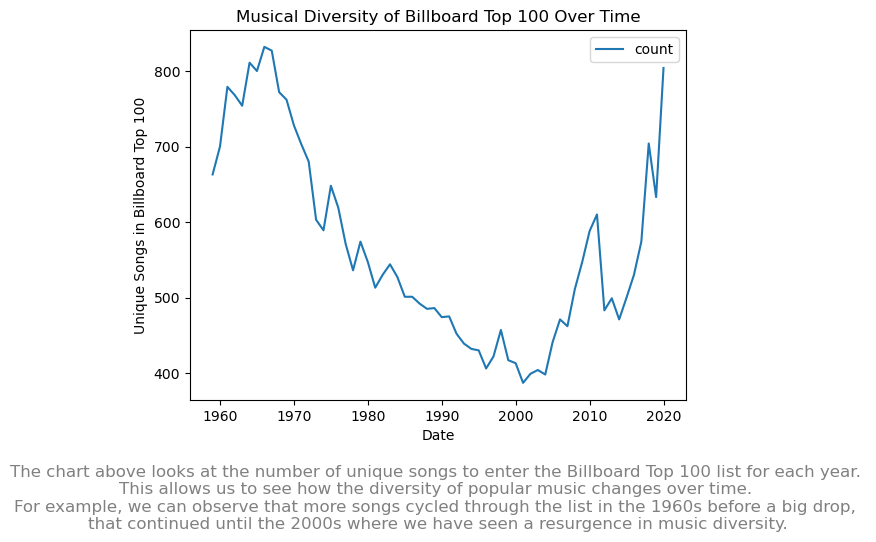

In [14]:
#Part B:

music_diversity = df_billboard.groupby(['year','performer','song'])[['week_position']].count()
music_diversity = music_diversity.rename(columns={"week_position": "count"})
music_diversity = music_diversity.drop(index = [1958,2021])
music_pivot = pd.pivot_table(music_diversity, index='year', columns=None, values='count', aggfunc='count')
music_plot = music_pivot.plot(xlabel='Date', ylabel='Unique Songs in Billboard Top 100', 
                 title='Musical Diversity of Billboard Top 100 Over Time').annotate('The chart above looks at the number of unique songs to enter the Billboard Top 100 list for each year. \nThis allows us to see how the diversity of popular music changes over time. \nFor example, we can observe that more songs cycled through the list in the 1960s before a big drop, \nthat continued until the 2000s where we have seen a resurgence in music diversity.', 
                                                                                    xy=(0.5, -.35), xycoords='axes fraction',fontsize=12, color='gray', ha='center')


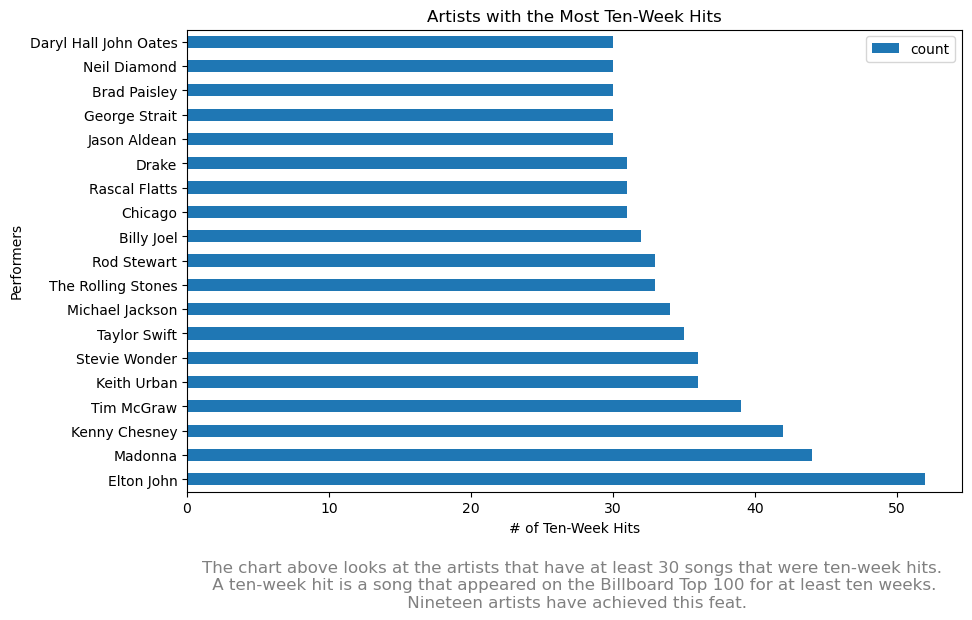

In [15]:
#Part C:

billboard_hits = weeks_on_billboard[weeks_on_billboard['count']>=10]
hits_pivot = pd.pivot_table(billboard_hits, index='performer', columns=None, values='count', aggfunc='count')
hits_plot = hits_pivot.sort_values(by='count', ascending=False)[:19]
hits_plot = hits_plot.plot(kind='barh', figsize=(10, 6), xlabel='# of Ten-Week Hits', ylabel='Performers', 
                   title='Artists with the Most Ten-Week Hits').annotate('The chart above looks at the artists that have at least 30 songs that were ten-week hits. \n A ten-week hit is a song that appeared on the Billboard Top 100 for at least ten weeks. \n Nineteen artists have achieved this feat.', 
                                                                     xy=(0.5, -.25), xycoords='axes fraction',fontsize=12, color='gray', ha='center')


### Visual Story Telling Part 1: Green Buildings

I do not agree with the Excel guru. 
First, the removal of buildings with low occupancy rates could heavily distort our results. If low occupancy rates are an influential predictor then removing it is removing potentially very informative data about how certain building aspects can decrease occupancy, especially when comparing these buildings to other buildings in the area. As you can see from the chart below, very low occupancy rates disproportionately affects non-green buildings. By removing these buildings you are artifically manipulating the data to improve the outlook for non-green buildings.

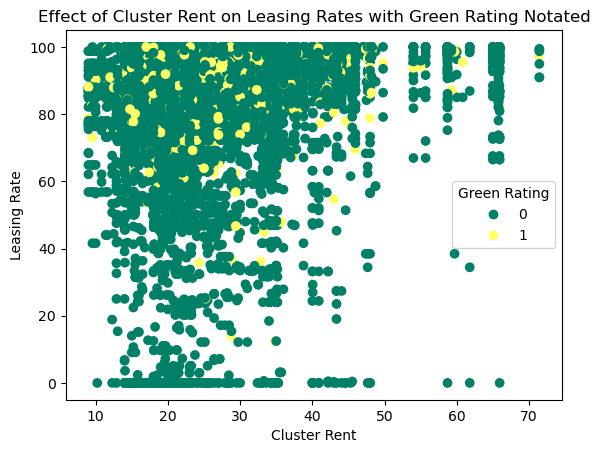

In [62]:
green_df = pd.read_csv('greenbuildings.csv')
sc = plt.scatter(green_df['cluster_rent'], green_df['leasing_rate'], c=green_df['green_rating'], cmap='summer')
plt.xlabel('Cluster Rent')
plt.ylabel('Leasing Rate')
plt.title('Effect of Cluster Rent on Leasing Rates with Green Rating Notated')
plt.legend(*sc.legend_elements(num=1),loc="center right", title="Green Rating")
plt.show()

Next, I disagree with the decision to look at the green buildings and non-green buildings separately. The data was collected very intentionally to pull in non-green buildings within a quarter mile, so we can, at least partially, control for the significant impact that location has on building rates and occupancy. The graph below demonstrates the large effect that clustering has on our variables. By looking at the difference in scale between the clustered and unclustered rent values you can see how looking at rent values outside of the context of local averages can lead to very different figures.

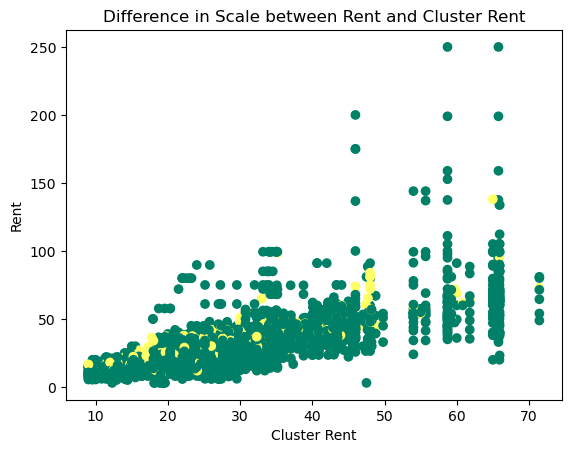

In [123]:
plt.scatter(green_df['cluster_rent'], green_df['Rent'], c=green_df['green_rating'], cmap='summer')
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Difference in Scale between Rent and Cluster Rent')
plt.show()

While the median does control for outliers, for this data set it is not recommended to look at median over mean because as you can see below many of the outliers that you are discounting belong to the building size that we are looking to occupy. These data points are especially important for us as we look at how building size can affect rent pricing.

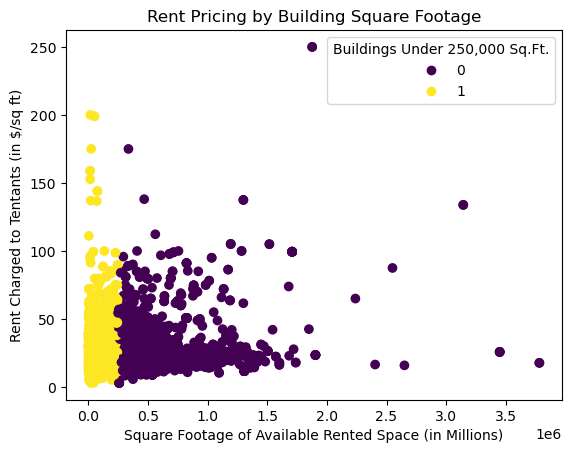

In [88]:
sr = plt.scatter(green_df['size'], green_df['Rent'], c=(green_df['size']<250000))
plt.xlabel('Square Footage of Available Rented Space (in Millions)')
plt.ylabel('Rent Charged to Tentants (in $/sq ft)')
plt.title('Rent Pricing by Building Square Footage')
plt.legend(*sr.legend_elements(num=1),loc="upper right", title="Buildings Under 250,000 Sq.Ft.")
plt.show()

One possible confounding variable is that green rated buildings are naturally newer. The age of the building could a counfounding variable because younger buildings could charge more for rent and green rated buildings tend to be newer. As you can see for the table below, the average age for green rated buildings is much lower. From the chart below, you can see that rent prices have a negative correlation with age of the building. These observations both provide evidence that age could be a confounding variable. 

In [113]:
green_df.groupby(['green_rating'])['age'].agg(['mean', 'count', 'median'])

mean  count
green_rating                 
0             0.362186   7209
1             0.797080    685

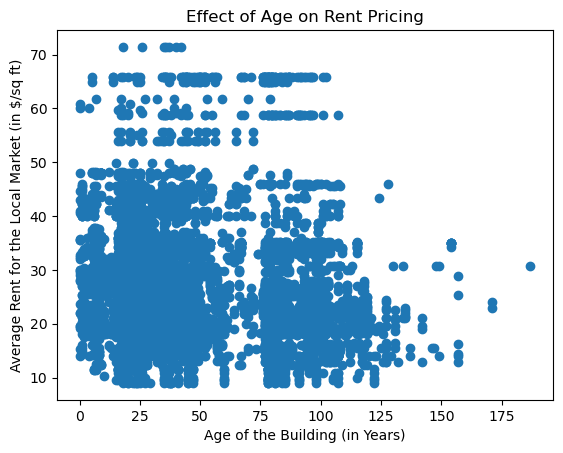

In [109]:
plt.scatter(green_df['age'], green_df['cluster_rent'])
plt.xlabel('Age of the Building (in Years)')
plt.ylabel('Average Rent for the Local Market (in $/sq ft)')
plt.title('Effect of Age on Rent Pricing')
plt.show()

Another possible confounding variable would be the Class A indicator because green rated buildings are generally higher quality buildings and come with more investment. In the table below, it shows that green rated buildings are much more likely to be Class A. In the second table below, you can see how rent for Class A buildings is higher, as expected, and this holds true for the rent not averaged by local market as well. To potentially 'adjust' for this confounder we could look at the difference in rent within Class B between green rated buildings and non-rated buildings. After graphing Class B buildings, it appears that green rated buildings actually charge less rent on average than non-rated buildings.

In [128]:
green_df.groupby(['green_rating'])['class_a'].agg(['mean', 'count'])

mean  count
green_rating                 
0             0.362186   7209
1             0.797080    685

In [120]:
green_df.groupby(['class_a'])['cluster_rent'].agg(['mean', 'count', 'median'])

mean  count  median
class_a                          
0        26.539997   4737  24.215
1        28.933671   3157  25.770

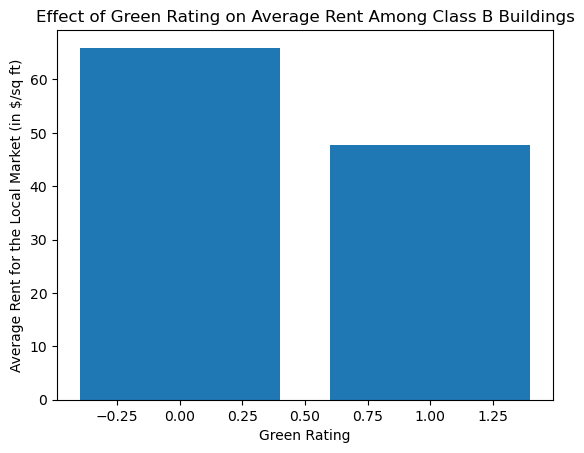

In [134]:
classb_mask = green_df[green_df['class_b'] == 1]
plt.bar(classb_mask['green_rating'], classb_mask['cluster_rent'])
plt.xlabel('Green Rating')
plt.ylabel('Average Rent for the Local Market (in $/sq ft)')
plt.title('Effect of Green Rating on Average Rent Among Class B Buildings')
plt.show()

### Visual Story Telling Part 2: Capital Metro data

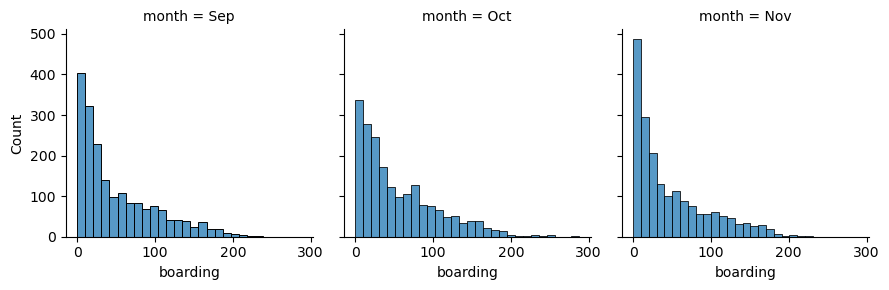

In [5]:
import seaborn as sns
metro_df = pd.read_csv('capmetro_UT.csv')
g = sns.FacetGrid(metro_df, col="month")
g.map_dataframe(sns.histplot, x="boarding")

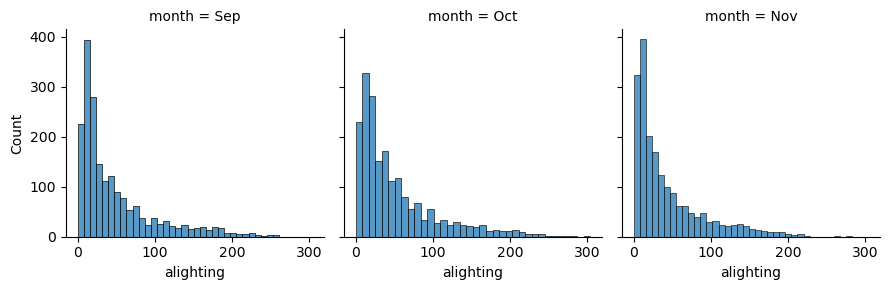

In [6]:
h = sns.FacetGrid(metro_df, col="month")
h.map_dataframe(sns.histplot, x="alighting")

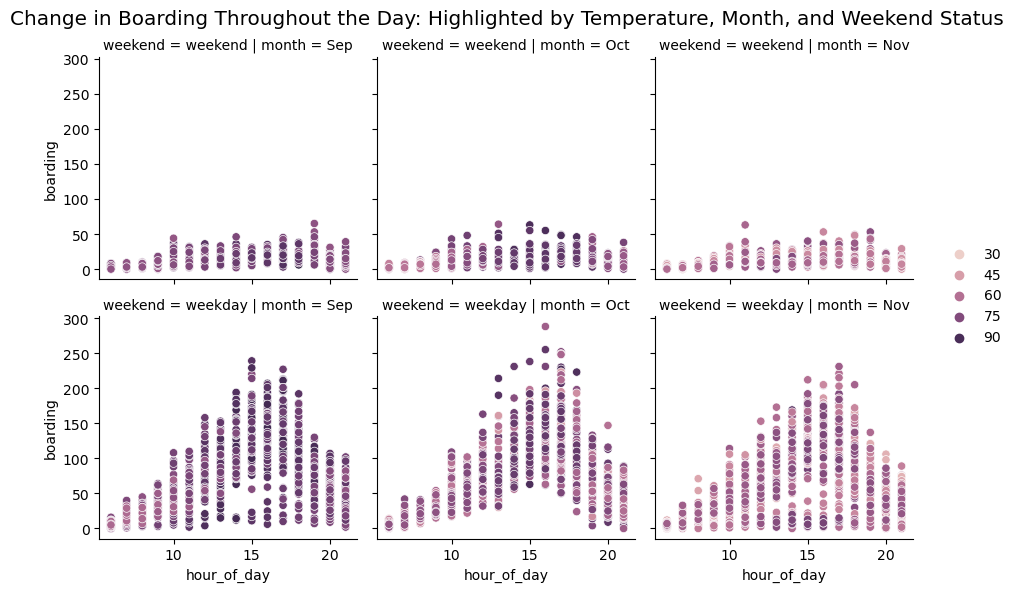

In [18]:
g = sns.FacetGrid(metro_df, col="month", row='weekend')
hueorder = metro_df['temperature'].sort_values()
g.map_dataframe(sns.scatterplot, x="hour_of_day", y="boarding", hue=hueorder, hue_order=True)
g.add_legend()
g.fig.suptitle("Change in Boarding Throughout the Day: Highlighted by Temperature, Month, and Weekend Status",fontsize = 'x-large')
g.fig.subplots_adjust( top = 0.9 )

In [139]:
metro_df.columns.values

array(['timestamp', 'boarding', 'alighting', 'day_of_week', 'temperature',
       'hour_of_day', 'month', 'weekend'], dtype=object)

### The Reuters corpus

In [2]:
import nltk
import random
import os
import re
import pandas as pd
from nltk.corpus import reuters, stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.text import Text

In [3]:
# Download the stopwords and Reuters corpus if not already downloaded
data_dir = "../Documents/GitHub/STA380/data/"
nltk.data.path.append(os.path.abspath(data_dir))
nltk.download('stopwords', download_dir=data_dir)
nltk.download('reuters', download_dir=data_dir)

# Preprocess documents
def preprocess(doc):
    stop_words = set(stopwords.words('english'))
    doc = doc.lower()
    doc = re.sub(r'[^a-z]+', ' ', doc)
    words = nltk.word_tokenize(doc)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Load the Reuters corpus and preprocess
fileids = reuters.fileids()
documents = [preprocess(reuters.raw(fileid)) for fileid in fileids]

[nltk_data] Downloading package stopwords to
[nltk_data]     ../Documents/GitHub/STA380/data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     ../Documents/GitHub/STA380/data/...
[nltk_data]   Package reuters is already up-to-date!


In [4]:
# Create an empty list to store data
data = []

# Iterate through each fileid in the reuters corpus
for fileid in reuters.fileids():
    # Get the categories associated with the current fileid
    categories = reuters.categories(fileid)
    
    # Append the fileid and its associated categories to the data list
    data.append({'document': fileid, 'categories': ', '.join(categories)})

# Create a DataFrame from the data list
df_categories = pd.DataFrame(data)

df_categories

document                                    categories
0         test/14826                                         trade
1         test/14828                                         grain
2         test/14829                                crude, nat-gas
3         test/14832  corn, grain, rice, rubber, sugar, tin, trade
4         test/14833                             palm-oil, veg-oil
...              ...                                           ...
10783   training/999                            interest, money-fx
10784  training/9992                                          earn
10785  training/9993                                          earn
10786  training/9994                                          earn
10787  training/9995                                          earn

[10788 rows x 2 columns]

In [5]:
words = word_tokenize(str(documents))

In [6]:
# frequency distribution of words
from nltk.probability import FreqDist

# Calculate the frequency distribution
fdist = FreqDist(words)

In [7]:
# filtering out stop words and punctuation
# Set up the list of stopwords and punctuation marks
stop_words = set(stopwords.words('english'))

In [8]:
punctuation = set(string.punctuation)
punctuation.add('--')
punctuation.add('``')
punctuation.add('\'\'')

# Remove stopwords and punctuation
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]

# Calculate the frequency distribution
fdist_filtered = FreqDist(filtered_words)

# Print the 10 most common words after filtering
print(fdist_filtered.most_common(10))

[('said', 25383), ('mln', 18623), ('vs', 14341), ('dlrs', 12417), ('pct', 9810), ('lt', 8412), ('cts', 8358), ('year', 7529), ('net', 6988), ('u', 6392)]


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', download_dir=data_dir)
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     ../Documents/GitHub/STA380/data/...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
from tqdm import tqdm
def get_sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

sentiment_scores_list = []

for _, fileid in tqdm(enumerate(fileids)):
    text = reuters.raw(fileid)
    sentiment_scores = get_sentiment_scores(text)
    sentiment_scores['document'] = fileid
    sentiment_scores_list.append(sentiment_scores)

10788it [00:31, 345.61it/s]


In [11]:
sentiment_df = pd.DataFrame(sentiment_scores_list)
sentiment_df = sentiment_df[['document', 'pos', 'neu', 'neg', 'compound']]
print(sentiment_df)

            document    pos    neu    neg  compound
0         test/14826  0.056  0.848  0.095   -0.9837
1         test/14828  0.059  0.800  0.141   -0.8750
2         test/14829  0.146  0.814  0.040    0.9517
3         test/14832  0.067  0.867  0.066    0.0173
4         test/14833  0.076  0.848  0.076   -0.0000
...              ...    ...    ...    ...       ...
10783   training/999  0.000  0.907  0.093   -0.5766
10784  training/9992  0.000  0.928  0.072   -0.1027
10785  training/9993  0.000  0.928  0.072   -0.1027
10786  training/9994  0.000  0.727  0.273   -0.9371
10787  training/9995  0.000  1.000  0.000    0.0000

[10788 rows x 5 columns]


In [12]:
# Merge based on the 'document' column
merged_sentiment_df = pd.merge(sentiment_df, df_categories, on='document')
print(merged_sentiment_df)

            document    pos    neu    neg  compound  \
0         test/14826  0.056  0.848  0.095   -0.9837   
1         test/14828  0.059  0.800  0.141   -0.8750   
2         test/14829  0.146  0.814  0.040    0.9517   
3         test/14832  0.067  0.867  0.066    0.0173   
4         test/14833  0.076  0.848  0.076   -0.0000   
...              ...    ...    ...    ...       ...   
10783   training/999  0.000  0.907  0.093   -0.5766   
10784  training/9992  0.000  0.928  0.072   -0.1027   
10785  training/9993  0.000  0.928  0.072   -0.1027   
10786  training/9994  0.000  0.727  0.273   -0.9371   
10787  training/9995  0.000  1.000  0.000    0.0000   

                                         categories  
0                                             trade  
1                                             grain  
2                                    crude, nat-gas  
3      corn, grain, rice, rubber, sugar, tin, trade  
4                                 palm-oil, veg-oil  
...            

In [13]:
# Split the 'categories' column into individual words and create dummy columns
categories_dummies = merged_sentiment_df['categories'].str.get_dummies(', ')

# Concatenate the original DataFrame with the dummy columns
merged_sentiment_df = pd.concat([merged_sentiment_df, categories_dummies], axis=1)

# Fill NaN values in the new columns with 0
category_sent_df = merged_sentiment_df.fillna(0)

category_sent_df

document    pos    neu    neg  compound  \
0         test/14826  0.056  0.848  0.095   -0.9837   
1         test/14828  0.059  0.800  0.141   -0.8750   
2         test/14829  0.146  0.814  0.040    0.9517   
3         test/14832  0.067  0.867  0.066    0.0173   
4         test/14833  0.076  0.848  0.076   -0.0000   
...              ...    ...    ...    ...       ...   
10783   training/999  0.000  0.907  0.093   -0.5766   
10784  training/9992  0.000  0.928  0.072   -0.1027   
10785  training/9993  0.000  0.928  0.072   -0.1027   
10786  training/9994  0.000  0.727  0.273   -0.9371   
10787  training/9995  0.000  1.000  0.000    0.0000   

                                         categories  acq  alum  barley  bop  \
0                                             trade    0     0       0    0   
1                                             grain    0     0       0    0   
2                                    crude, nat-gas    0     0       0    0   
3      corn, grain, rice, rubber, sugar, tin, trade    0     0       0    0   
4                                 palm-oil, veg-oil    0     0       0    0   
...                                             ...  ...   ...     ...  ...   
10783                            interest, money-fx    0     0       0    0   
10784                                          earn    0     0       0    0   
10785                                          earn    0     0       0    0   
10786                                          earn    0     0       0    0   
10787                                          earn    0     0       0    0   

       ...  sun-oil  sunseed  tea  tin  trade  veg-oil  wheat  wpi  yen  zinc  
0      ...        0        0    0    0      1        0      0    0    0     0  
1      ...        0        0    0    0      0        0      0    0    0     0  
2      ...        0        0    0    0      0        0      0    0    0     0  
3      ...        0        0    0    1      1        0      0    0    0     0  
4      ...        0        0    0    0      0        1      0    0    0     0  
...    ...      ...      ...  ...  ...    ...      ...    ...  ...  ...   ...  
10783  ...        0        0    0    0      0        0      0    0    0     0  
10784  ...        0        0    0    0      0        0      0    0    0     0  
10785  ...        0        0    0    0      0        0      0    0    0     0  
10786  ...        0        0    0    0      0        0      0    0    0     0  
10787  ...        0        0    0    0      0        0      0    0    0     0  

[10788 rows x 96 columns]

In [14]:
import networkx as nx

# Create a graph from the DataFrame
G = nx.Graph()

# Add nodes (words) to the graph
for column in categories_dummies.columns:
    G.add_node(column)

# Add edges between nodes (words) based on DataFrame values
for index, row in categories_dummies.iterrows():
    for column in categories_dummies.columns:
        if row[column] == 1:
            weight = merged_sentiment_df.at[index, 'compound']
            G.add_edge(index, column, weight=weight)

# Save the graph as a GraphML file
nx.write_graphml(G, 'category_graph.graphml')

Questions: What topics come up in Reuters stories most often? Which topics are often written in conjunction with other topics? What topics are often written with negative sentiment or positive sentiment?

Approach: I began by reading in the Reuters stories from the GitHub repository and processing the data using the code from the reuters example file. I then created a dataframe to match up each story with the relevant categories they include. The words within each documents were then tokenized and stop words were filtered out after a frequency distribution was run. A sentiment analysis was then run on each document. Next, I merged the results of the sentiment analysis with the category dataframe to create one concise dataframe to capture each story, its categories, and its sentiment. After this, I broke out each category into its own column in the dataframe and turned these into binary variables to measure whether that story included that topic. I did this in order to connect which topics were used across different stories. I then exported this dataframe into a graphml file to graph this data on Gephi. I used the Yifan Hu layout and varied the node label based on frequency. I also used the compound sentiment score as the weight for the edges so the color of the lines connecting the nodes points to the sentiment of those stories. I then edited color, text, and size to make the chart more presentable before exporting the final graph.

Results: The final Gephi graph illustrates which topics are most often written about. It also shows which topics often appear in the same stories. Lastly, the graph shows which topics are often written about in positive or negative language.

Conclusions: In Reuters, the topic of 'earn' is most often written about followed by 'acq'. 'Earn' is written about mostly positively, with a healthy mixture of negative stories as well. 'Earn' is most often a standalone topic compared to the other topics. The most interconnected set of topics all revolve around agriculture with 'grain', 'wheat', and 'corn' being the most written about topics of this group. These stories are most often positive in nature, but include a minority of negative stories as well. This cluster connects to other clusters about trade and energy resources. The agriculture cluster connects directly to 'ship' which then connects to 'crude' and other natural resources, such as 'nat gas' and 'copper'. These clusters have the highest percentage of negative stories with the majority of stories around shipping being negative. On the other end of the graph, the last remaining large cluster of topics is for 'money-fx' which is tied closely to 'interest' and is connected to the other clusters through 'trade'. 'Money-fx', 'interest', and 'money supply' are overwhelmingly written about positively, but as you go towards 'trade' and 'jobs' the sentiment switches to more negative stories. 